In [1]:
from simulated_annealing import simulatedAnnealing
from evolutionary import evolutionaryAlgorithm
from beam_search import stochasticBeamSearch
from plotter_cost_iter import plotCostvsIterationLoggedDataList
from plotter_avg_cost_iter import plotAvgCostvsIterationLoggedDataList
from tour_plotter import plotSolutionOnCities
from stat_measures import computeStatMeasuresAndPlot

In [4]:
NUM_RUNS = 15

## Simulated Annealing

In [5]:
logged_data_list = []
for i in range(NUM_RUNS):
    logged_data_list.append(simulatedAnnealing('/home/raghav/grad_school/quarter_1/ROB_537_Learning_Based_Constrol/SoSeAl/hw2.csv', 
                                                10000, 2, 100, 0.99))

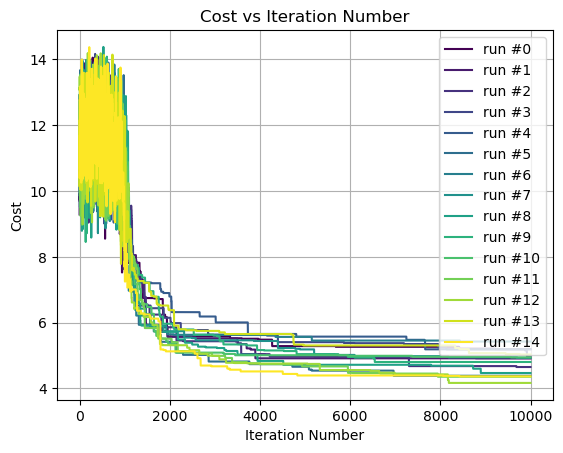

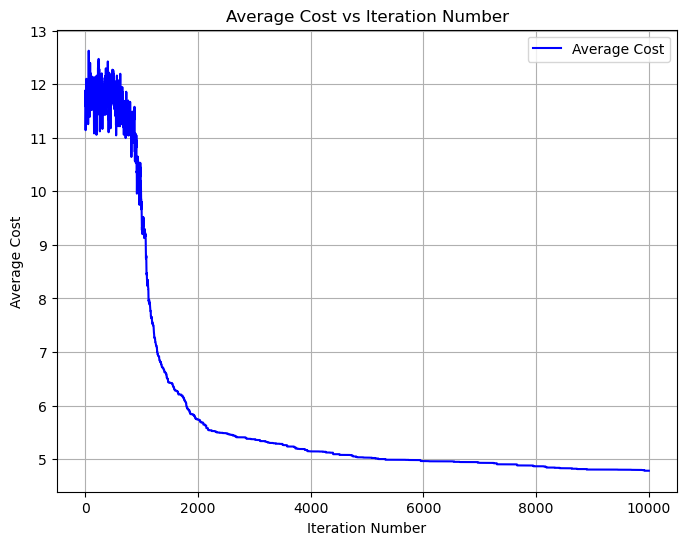

Cost:  4.365996548230324


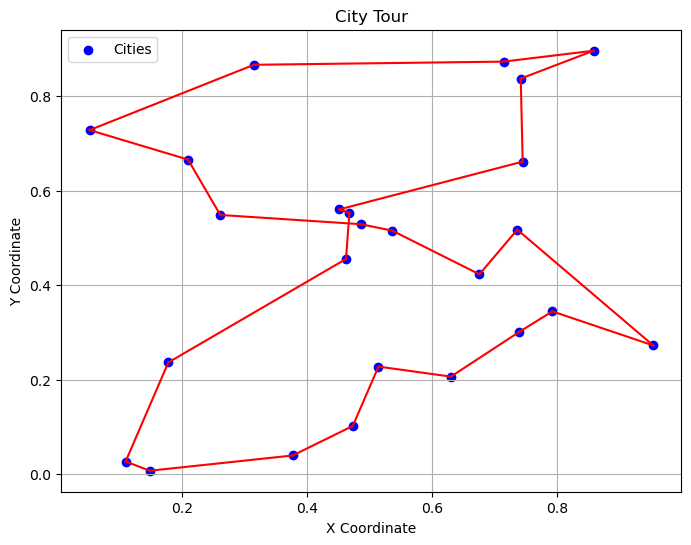

[([21, 22, 23, 20, 2, 17, 12, 14, 11, 18, 1, 10, 8, 24, 7, 5, 16, 19, 6, 15, 0, 9, 3, 13, 4], 5.193855299691688), ([0, 1, 2, 24, 20, 15, 9, 6, 7, 23, 17, 8, 12, 3, 13, 18, 4, 22, 14, 5, 16, 11, 19, 10, 21], 4.909521961135917), ([24, 0, 1, 9, 20, 8, 15, 13, 17, 11, 22, 16, 3, 2, 4, 21, 12, 10, 6, 7, 23, 5, 18, 14, 19], 4.650156103067934), ([21, 22, 4, 20, 8, 16, 13, 14, 10, 19, 17, 12, 1, 3, 2, 6, 24, 18, 23, 15, 5, 0, 9, 11, 7], 4.973203170252395), ([19, 16, 15, 18, 8, 2, 11, 24, 10, 5, 3, 12, 22, 20, 21, 6, 1, 4, 23, 0, 17, 14, 9, 13, 7], 5.188024783285684), ([21, 20, 19, 24, 5, 6, 9, 12, 11, 23, 1, 10, 16, 18, 17, 2, 7, 22, 14, 13, 0, 15, 3, 8, 4], 4.384103090475033), ([24, 21, 22, 0, 3, 6, 15, 8, 16, 1, 18, 14, 13, 23, 12, 17, 7, 2, 20, 9, 19, 11, 5, 10, 4], 5.424653698096701), ([13, 24, 12, 15, 19, 14, 5, 3, 4, 16, 22, 6, 10, 11, 9, 21, 1, 17, 0, 2, 23, 8, 20, 7, 18], 4.929892843270334), ([8, 14, 13, 7, 1, 23, 17, 20, 19, 5, 3, 18, 10, 12, 11, 2, 22, 6, 15, 21, 4, 9, 24, 16, 0], 4.

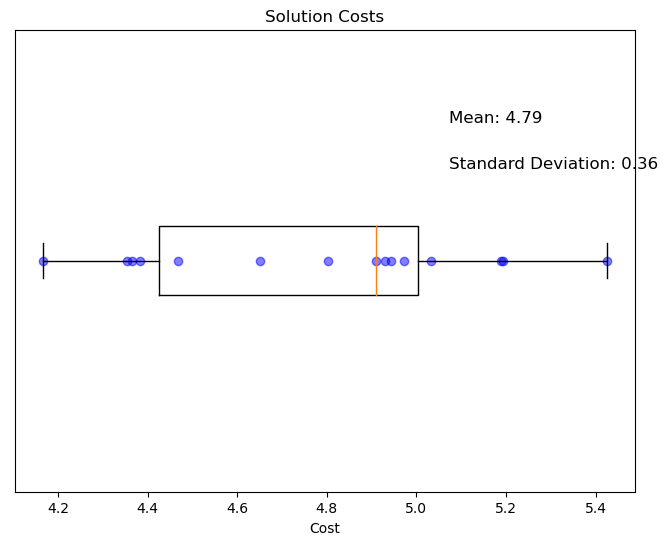

In [6]:
plotCostvsIterationLoggedDataList(logged_data_list, NUM_RUNS)
plotAvgCostvsIterationLoggedDataList(logged_data_list, NUM_RUNS)
runs_solutions_costs_list = [(logged_data[-1][0], logged_data[-1][2]) for logged_data in logged_data_list]
computeStatMeasuresAndPlot(runs_solutions_costs_list)
plotSolutionOnCities('/home/raghav/grad_school/quarter_1/ROB_537_Learning_Based_Constrol/SoSeAl/hw2.csv', logged_data_list[-1][-1][0])
print(runs_solutions_costs_list)

### Algorithm
Create an initial solution by randomly arranging the order of cities.

In the main loop:
1. Generate a new solution by mutating the current one by swapping the position of 2 random cities in the traversal order. Swap as many times as specified.
2. If the cost of the new solution is lower than the current solution, accept the new solution.
3. If the cost of the new solution is greater than the current solution, accept it with a probability that depends on the difference in costs of the two solution, and the temperature.
4. Reduce the temperature by multiplying it with the scaling factor.

Return the solution produced in each iteration with the corresponding iteration number and the cost.

#### Notes:
1. The probability $P$ of picking the new solution with higher cost is given by 
$P = e^{-(C' - C)/T}$ where $C$ is the cost of the current solution, $C'$ is the cost of the new solution, and $T$ is the temperature.

2. After each iteration of the loop, the temperature $T$ is updated as:
$T=T \times T_{f}$ Where $0<T_{f}\lt1$ is the temperature decay factor.

## Evolutionary Algorithm

In [12]:
logged_data_list = []
for i in range(NUM_RUNS):
    logged_data_list.append(evolutionaryAlgorithm('/home/raghav/grad_school/quarter_1/ROB_537_Learning_Based_Constrol/SoSeAl/hw2.csv',
                                                  50, 1000, 3))

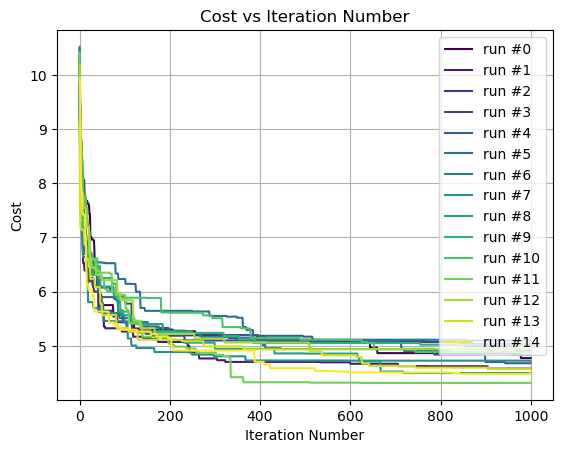

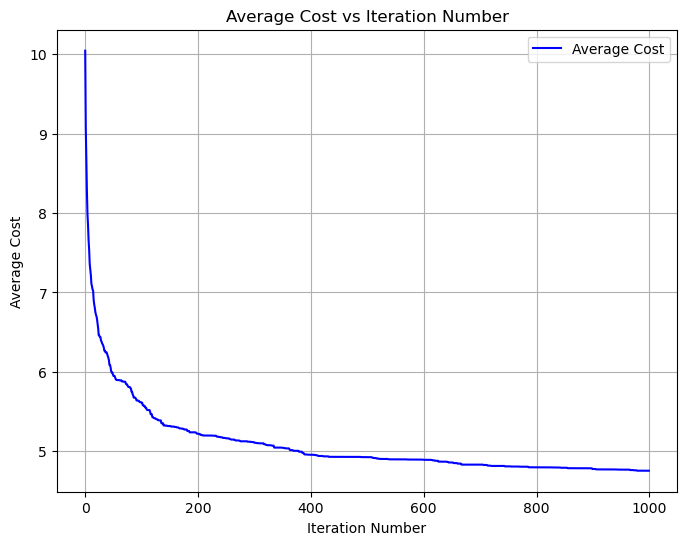

Cost:  4.480292462205373


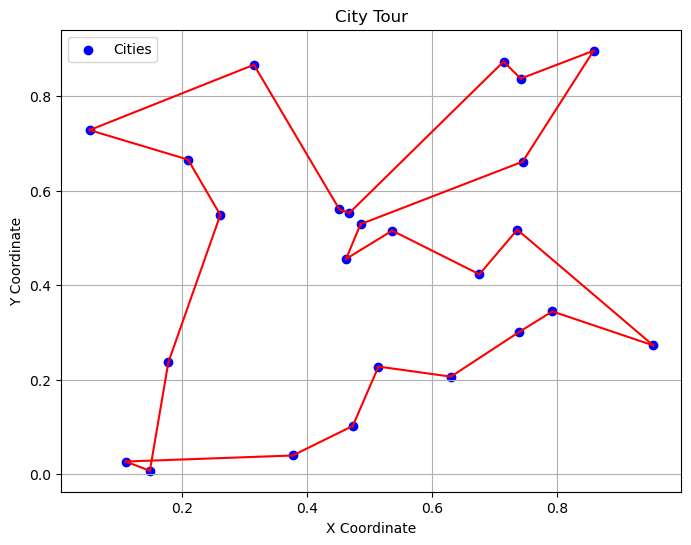

In [13]:
plotCostvsIterationLoggedDataList(logged_data_list, NUM_RUNS)
plotAvgCostvsIterationLoggedDataList(logged_data_list, NUM_RUNS)
plotSolutionOnCities('/home/raghav/grad_school/quarter_1/ROB_537_Learning_Based_Constrol/SoSeAl/hw2.csv', logged_data_list[-1][-1][0])

### Algorithm

Create an initial population of solutions, where each solution is a random arrangement of cities.

In the main loop:
1. Calculate the normalised cost distribution for each solution of the population.
2. Select a solution from the population using the specific selection method.
3. Replace every other solution in the population with a mutated version of the selected solution. Mutate by swapping two randomly-picked cities. Perform as many swaps as specified. This creates the next 'generation'.

Return the solution selected in each iteration with the corresponding iteration number and the cost.

#### Selection technique:
The probability of picking a solution $s_i$ in the population is given by $P(s_i) = e^{-c_{i}\times M} \forall i \in \{0, 1, 2, \ldots, N-1 \}$ where $c_i$ is the cost of $s_i$, $M \in \mathbb{R}^+$ is a large positive number and $N$ is the number of solutions in the population.

This selection technique is preferred over the standard Roulette-Wheel selection as this technique greatly weighs the effect of cost in selection, and reduces stochasticity in selection, without eliminating it.

## Stochastic Beam Search (Population Based)

In [18]:
logged_data_list = []
for i in range(NUM_RUNS):
    logged_data_list.append(stochasticBeamSearch('/home/raghav/grad_school/quarter_1/ROB_537_Learning_Based_Constrol/SoSeAl/hw2.csv',
                                                 50, 4000, 3))

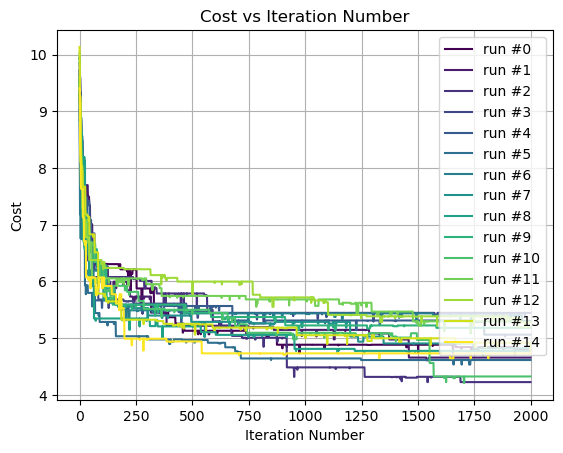

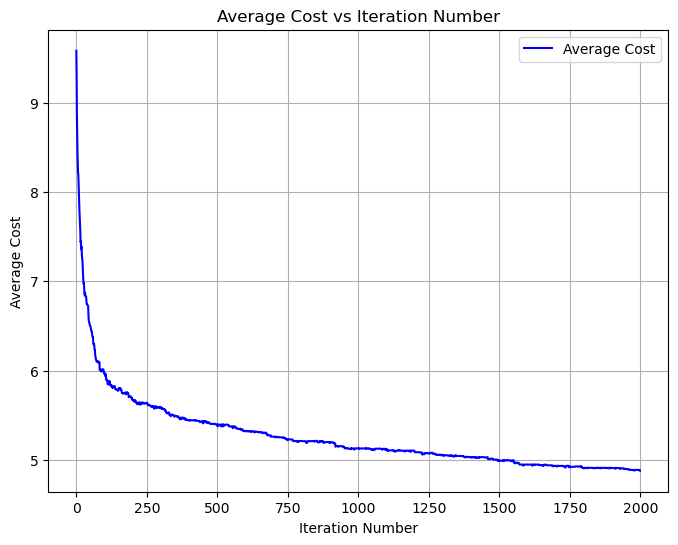

Cost:  4.732200927219406


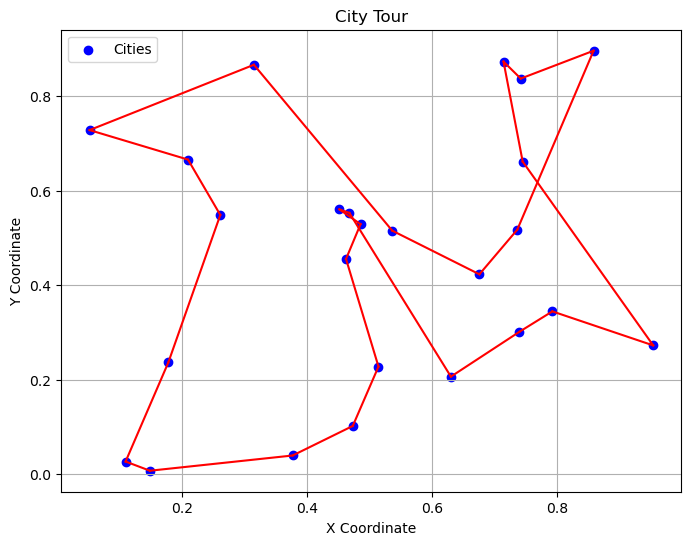

In [8]:
plotCostvsIterationLoggedDataList(logged_data_list, NUM_RUNS)
plotAvgCostvsIterationLoggedDataList(logged_data_list, NUM_RUNS)
plotSolutionOnCities('/home/raghav/grad_school/quarter_1/ROB_537_Learning_Based_Constrol/SoSeAl/hw2.csv', logged_data_list[-1][-1][0])

### Algorithm

Create an initial population of solutions, where each solution is a random arrangement of cities.

In the main loop:
1. For each solution in the population, create a next state of the solution via mutation and add it to the population. Mutate by swapping two randomly-picked cities. Perform as many swaps as specified.
2. Calculate the normalised cost distribution for each solution in the population.
2. Select half the solutions from the population using the specific selection method.
3. Set these solutions as the new population.

Return the best of the solutions selected in each iteration with the corresponding iteration number and the cost.

#### Selection technique:
The probability of picking a solution $s_i$ in the population is given by $P(s_i) = e^{-c_{i}\times M} \forall i \in \{0, 1, 2, \ldots, N-1 \}$ where $c_i$ is the cost of $s_i$, $M \in \mathbb{R}^+$ is a large positive number and $N$ is the number of solutions in the population.

This selection technique is preferred over the standard Roulette-Wheel selection as this technique greatly weighs the effect of cost in selection, and reduces stochasticity in selection, without eliminating it.